In [1]:
import pandas as pd
from fpdf import FPDF

import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# Load dataset
file_path = "C:\\Users\\PRAJNA\\Downloads\\preprocessed_data_with_averages_v2.xlsx"
df = pd.read_excel(file_path)

# Map the columns to required structure
df['Date'] = pd.to_datetime('2024-11-01')  # Assign a default date if not available
df['Pollutant'] = df['category']           # Map 'category' to 'Pollutant'
df['Region'] = 'Default Region'            # Assign a default region
df['Pollutant Level (µg/m³)'] = df['co']   # Map 'co' to 'Pollutant Level (µg/m³)'

# Select only the required columns
required_columns = ["Date", "Pollutant", "Region", "Pollutant Level (µg/m³)"]
df = df[required_columns]

# Generate report summary
report_summary = df.groupby("Pollutant")["Pollutant Level (µg/m³)"].describe()

# Define PDF report structure
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, "Pollution Report", ln=True, align="C")
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 8)
        self.cell(0, 10, f"Page {self.page_no()}", 0, 0, "C")

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, f"{title}", ln=True)
        self.ln(5)

    def chapter_body(self, body):
        self.set_font("Arial", "", 12)
        self.multi_cell(0, 10, body)
        self.ln(5)

# Create PDF document
pdf = PDF()
pdf.add_page()

# Executive Summary
pdf.chapter_title("Executive Summary")
pdf.chapter_body("This report provides a summary of weather pollution data collected from the provided dataset.")

# Table of Contents
pdf.chapter_title("Table of Contents")
pdf.chapter_body("1. Executive Summary\n2. Table of Contents\n3. Introduction\n4. Body\n5. Conclusion\n6. References\n7. Appendix")

# Introduction
pdf.chapter_title("Introduction")
pdf.chapter_body("This report analyzes air pollution data, capturing different pollutants' daily levels. The report's purpose is to provide insights on air quality and potential measures to address pollution.")

# Body (Main Report)
pdf.chapter_title("Body")
pdf.chapter_body("Below is the summary of pollution data:\n")
for pollutant, data in report_summary.iterrows():
    pdf.chapter_body(f"{pollutant}: Mean={data['mean']:.2f} µg/m³, Max={data['max']:.2f} µg/m³")

# Conclusion
pdf.chapter_title("Conclusion")
pdf.chapter_body("This analysis shows fluctuating pollution levels across various pollutants. Further measures can include pollution monitoring and alert systems to mitigate pollution impacts.")

# References
pdf.chapter_title("References")
pdf.chapter_body("Data is sourced from the provided dataset.")

# Appendix
pdf.chapter_title("Appendix")
pdf.chapter_body("Sample data is shown below.")
for i, row in df.iterrows():
    pdf.chapter_body(f"Date: {row['Date']}, Pollutant: {row['Pollutant']}, Level: {row['Pollutant Level (µg/m³)']:.2f} µg/m³")

# Save PDF to Downloads folder
output_path = os.path.join(os.path.expanduser("~"), "Downloads", "Weather_Pollution_Report.pdf")
pdf.output(output_path)

print(f"Report saved as {output_path}")

# Email setup
sender_email = "prajnaatthaje@gmail.com"
receiver_email = "prajnapoojari14@gmail.com"
subject = "Weather Pollution Report - Data Analysis"
body = """
Dear Authorizer,

Please find attached the weather pollution report based on the provided dataset.
This report provides detailed insights into pollution levels and suggested precautions.

Best regards,
Prajnaatthaje Team
"""

# Function to send email
def send_email():
    # Create email message
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    # Attach body and PDF
    message.attach(MIMEText(body, "plain"))
    with open(output_path, "rb") as file:
        attach = MIMEApplication(file.read(), _subtype="pdf")
        attach.add_header("Content-Disposition", "attachment", filename="Weather_Pollution_Report.pdf")
        message.attach(attach)

    # Send the email using SMTP
    try:
        with smtplib.SMTP("smtp.gmail.com", 587) as server:
            server.starttls()
            # Note: Replace 'your_app_password' with your Gmail app-specific password if needed
            server.login(sender_email, "ljoa ypqr idsa lvzr")
            server.sendmail(sender_email, receiver_email, message.as_string())
            print("Email sent successfully.")
    except smtplib.SMTPException as e:
        print(f"An error occurred while sending the email: {e}")

# Call the function to send the email with the report attached
send_email()

Report saved as C:\Users\PRAJNA\Downloads\Weather_Pollution_Report.pdf
Email sent successfully.


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.3225 - val_loss: 0.2392
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2333 - val_loss: 0.1168
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1529 - val_loss: 0.0278
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.0831 - val_loss: 0.0069
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0440 - val_loss: 0.1271
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0936 - val_loss: 0.0947
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0461 - val_loss: 0.0444
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0326 - val_loss: 0.0182
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0306 - val_loss: 0.0096
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0273 - val_loss: 0.0065
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0320 - val_loss: 0.0053
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0314 - val_loss: 0.0059
E

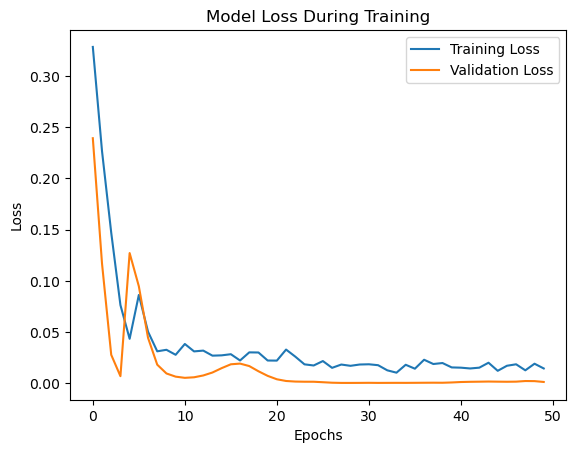

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
   Actual   Predicted
0   198.5  181.437071
1   198.5  174.369420
2   198.5  175.445282
3   198.5  181.311911
4   198.5  183.982968
Accuracy (within 10% tolerance): 87.50%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Enter the day (1-31):  1
Enter the month (1-12):  1
Enter the year (e.g., 2025):  2025


Predicted CO level for 2025-01-01: 0.84


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\PRAJNA\\Downloads\\updated_dataset_with_dates.xlsx"  # Replace with the actual file path
data = pd.read_excel(file_path)

# Ensure date is in datetime format
data['ds'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with missing values in key columns
data = data.dropna(subset=['ds', 'co'])

# Sort data by date
data = data.sort_values(by='ds')

# Add additional features (e.g., month, day, weekday)
data['month'] = data['ds'].dt.month
data['day'] = data['ds'].dt.day
data['weekday'] = data['ds'].dt.weekday

# Define the columns to be included as features
feature_columns = ['month', 'day', 'weekday', 'co', 'p_hc', 'g_co', 'g_hc']
scaler = MinMaxScaler()

# Normalize the features
scaled_features = scaler.fit_transform(data[feature_columns])

# Define time_steps for sequence
time_steps = 30  # Use past 30 days to predict the next day

# Prepare data for LSTM
X_seq = []
X_static = []
y = []

for i in range(time_steps, len(scaled_features)):
    # Sequential data for LSTM (time series)
    X_seq.append(scaled_features[i - time_steps:i, :-1])  # Exclude the target column
    # Static data for Dense layers (current day features)
    X_static.append(scaled_features[i, :-1])  # Exclude the target column
    # Target variable (pollutant)
    y.append(scaled_features[i, -1])

X_seq, X_static, y = np.array(X_seq), np.array(X_static), np.array(y)

# Split data into training and testing sets
X_seq_train, X_seq_test, X_static_train, X_static_test, y_train, y_test = train_test_split(
    X_seq, X_static, y, test_size=0.2, random_state=42, shuffle=False
)

# Build the multi-input model
seq_input = Input(shape=(X_seq_train.shape[1], X_seq_train.shape[2]), name="Sequential_Input")
lstm = LSTM(64, activation='relu', return_sequences=True)(seq_input)
lstm = Dropout(0.3)(lstm)
lstm = LSTM(64, activation='relu')(lstm)
lstm_output = Dropout(0.3)(lstm)

static_input = Input(shape=(X_static_train.shape[1],), name="Static_Input")
dense_static = Dense(32, activation='relu')(static_input)
dense_static = Dropout(0.3)(dense_static)

# Combine LSTM and static input layers
combined = Concatenate()([lstm_output, dense_static])
dense = Dense(64, activation='relu')(combined)
dense = Dropout(0.3)(dense)
output = Dense(1, activation='linear', name="Output")(dense)

# Compile the model
model = Model(inputs=[seq_input, static_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    [X_seq_train, X_static_train],
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=([X_seq_test, X_static_test], y_test),
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make predictions and rescale them to the original scale
y_pred = model.predict([X_seq_test, X_static_test])
y_pred_rescaled = scaler.inverse_transform(np.concatenate(
    [np.zeros((len(y_pred), scaled_features.shape[1] - 1)), y_pred], axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate(
    [np.zeros((len(y_test), scaled_features.shape[1] - 1)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Calculate accuracy as percentage of predictions within a 10% tolerance
threshold = 0.1  # 10% tolerance
accuracy = np.mean(np.abs(y_test_rescaled - y_pred_rescaled) / y_test_rescaled <= threshold) * 100

# Display results
results = pd.DataFrame({
    'Actual': y_test_rescaled.flatten(),
    'Predicted': y_pred_rescaled.flatten()
})

print(results.head())

# Print accuracy
print(f"Accuracy (within 10% tolerance): {accuracy:.2f}%")

# Save the results to an Excel file (optional)
results.to_excel('prediction_results.xlsx', index=False)

# Forecasting for future data points (additional part)
last_sequence = X_seq[-1:]  # Taking the last sequence from the test set

predictions = []

# Forecasting next 6 months (assuming 30 days in a month)
forecast_days = 180  # 6 months forecast
for _ in range(forecast_days):
    next_pred = model.predict([last_sequence, X_static_test[-1:].reshape(1, -1)])  # Use static features from the last test sample
    predictions.append(next_pred[0, 0])
    
    # Reshape next_pred to match the feature dimensions (1, 1, number_of_features)
    next_pred_reshaped = np.array(next_pred).reshape((1, 1, 1))  # Reshape for LSTM input
    next_pred_reshaped = np.repeat(next_pred_reshaped, last_sequence.shape[2], axis=2)  # Repeat to match feature dimension

    # Update the last sequence with the new prediction
    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_pred_reshaped], axis=1)

# Rescale the predictions to the original scale
predicted_co = scaler.inverse_transform(np.concatenate(
    [np.zeros((len(predictions), scaled_features.shape[1] - 1)), np.array(predictions).reshape(-1, 1)], axis=1))[:, -1]

# Display the forecasted values
forecast_results = pd.DataFrame({
    'Predicted CO Level': predicted_co
})

print(forecast_results)

# Allow user to input a future date for prediction
def predict_for_future_date(day, month, year):
    # Create future date
    future_date = pd.to_datetime(f'{year}-{month:02d}-{day:02d}')
    # Calculate how many days from the last date in the dataset to the user input date
    last_date = data['ds'].max()
    days_diff = (future_date - last_date).days
    
    # Forecast CO level based on the number of days ahead
    future_prediction = predictions[days_diff] if days_diff < len(predictions) else None
    
    if future_prediction is not None:
        print(f"Predicted CO level for {future_date.strftime('%Y-%m-%d')}: {future_prediction:.2f}")
    else:
        print(f"No prediction available for {future_date.strftime('%Y-%m-%d')}. The forecast does not extend that far.")

# Example usage for user input
day = int(input("Enter the day (1-31): "))
month = int(input("Enter the month (1-12): "))
year = int(input("Enter the year (e.g., 2025): "))

predict_for_future_date(day, month, year)
